In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv


*Importing Libraries*

In [70]:
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()

# for data overview
from pandas_profiling import ProfileReport
import plotly.graph_objects as go
fig = go.Figure()
import re




*Importing CSV file*

In [71]:
movie_data = pd.read_csv("/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv")

*Dataset Overview*

In [72]:
movie_data.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [73]:
movie_data.shape

(16744, 17)

In [74]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

*dropping country and directors*

In [75]:
df=pd.DataFrame(movie_data)
df.drop(['Unnamed: 0','Directors','Country','Type'], axis=1, inplace= True)
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Genres,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Action,Sci-Fi",English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Action,Adventure,Sci-Fi",English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,"Adventure,Comedy,Sci-Fi",English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Western,Italian,161.0


*NULL Values*

In [76]:
movie_data.isnull().sum()

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

*Dealing with NULL Values*

In [77]:
Age_Null = round(movie_data['Age'].isnull().sum()/len(movie_data['Age']) * 100 , 2)
Genres_Null = round(movie_data['Genres'].isnull().sum()/len(movie_data['Genres']) * 100 , 2)
Directors_Null = round(movie_data['Directors'].isnull().sum()/len(movie_data['Directors']) * 100 , 2)
Runtime_Null = round(movie_data['Runtime'].isnull().sum()/len(movie_data['Runtime']) * 100 , 2)
Language_Null = round(movie_data['Language'].isnull().sum()/len(movie_data['Language']) * 100 , 2)
Country_Null = round(movie_data['Country'].isnull().sum()/len(movie_data['Country']) * 100 , 2)    
Rotten_Null = round(movie_data['Rotten Tomatoes'].isnull().sum()/len(movie_data['Rotten Tomatoes']) * 100 , 2)                          

In [78]:
print("Age Null: {}%".format(Age_Null))
print("Genres_Null: {}%".format(Genres_Null))
print("Directors_Null: {}%".format(Directors_Null))
print("Runtime_Null : {}%".format(Runtime_Null))
print("Language_Null: {}%".format(Language_Null))
print("Country_Null: {}%".format(Country_Null))
print("Rotten_Null: {}%".format(Rotten_Null))

Age Null: 56.08%
Genres_Null: 1.64%
Directors_Null: 4.34%
Runtime_Null : 3.54%
Language_Null: 3.58%
Country_Null: 2.6%
Rotten_Null: 69.19%


In [79]:
#eg: let us deal with age 
movie_data['Age'].value_counts(), movie_data['Age'].shape

(18+    3474
 7+     1462
 13+    1255
 all     843
 16+     320
 Name: Age, dtype: int64,
 (16744,))

In [80]:
movie_data['Age'].value_counts().iplot('bar')

*values missing age input*

In [81]:
movie_data[movie_data['Age'].isnull()].shape

(9390, 17)

In [82]:
movie_data[movie_data['Age'].isnull()]

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
32,32,33,Train to Busan,2016,NaN,7.5,94%,1,0,1,0,0,Sang-ho Yeon,"Action,Horror,Thriller",South Korea,"Korean,Hawaiian",118.0
57,57,58,A Silent Voice,2016,NaN,8.2,94%,1,0,0,0,0,Naoko Yamada,"Animation,Drama,Family,Romance",Japan,"Japanese,Japanese Sign Language",130.0
89,89,90,The Dawn Wall,2018,NaN,8.1,100%,1,0,0,0,0,"Josh Lowell,Peter Mortimer","Documentary,Biography,Sport","Austria,United States",English,100.0
110,110,111,Black Mirror: Bandersnatch,2018,NaN,7.2,92%,1,0,0,0,0,David Slade,"Drama,Mystery,Sci-Fi,Thriller","United States,United Kingdom",English,90.0
123,123,124,Neon Genesis Evangelion: The End of Evangelion,1997,NaN,8.1,88%,1,0,0,0,0,"Hideaki Anno,Kazuya Tsurumaki","Animation,Action,Drama,Fantasy,Sci-Fi",Japan,Japanese,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16736,16736,16737,Winged Seduction: Birds of Paradise,2012,NaN,6.5,NaN,0,0,0,1,0,Molly Hermann,Documentary,United States,English,NaN
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


*Exploratory Data Analysis*

In [83]:
print(movie_data.columns)
movie_data.head(3)

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0


1. Rotten tomatoes ratings

In [84]:
movie_data['Rotten Tomatoes'].value_counts()

100%    407
80%     162
50%     136
83%     131
67%     126
       ... 
28%      10
7%       10
4%        9
3%        4
2%        4
Name: Rotten Tomatoes, Length: 99, dtype: int64

In [85]:
#rounding off for histogram representation
import re

def convert_str_to_int(val):
    new_val =  re.sub('%','',val)
    return(int(new_val))

def round_fix(data):
    data_str = str(data).strip()
    if data_str != 'nan':
        data = convert_str_to_int(data_str)
        if data in range(0,11):
            return '10'
        if data in range(11,21):
            return '20'
        if data in range(21,31):
            return '30'
        if data in range(31,41):
            return '40'
        if data in range(41,51):
            return '50'
        if data in range(51,61):
            return '60'
        if data in range(61,71):
            return '70'
        if data in range(71,81):
            return '80'
        if data in range(81,91):
            return '90'

        if data in range(91,101):
            return '100'


movie_data['Rotten_Tomatoes_overview'] = movie_data['Rotten Tomatoes'].apply(round_fix)

In [86]:
movie_data['Rotten_Tomatoes_overview'].value_counts().iplot(kind='bar', bins=20, xTitle = 'Rotten Tomatoes Ratings', yTitle='Number of movies', title='OTT ROtten TOmatoes')

*which platform has better collection*

In [87]:
netflix_count = movie_data[movie_data['Rotten_Tomatoes_overview'] == '100']['Netflix'].sum()
Hulu_count = movie_data[movie_data['Rotten_Tomatoes_overview'] == '100']['Hulu'].sum()
Disney_count = movie_data[movie_data['Rotten_Tomatoes_overview'] == '100']['Disney+'].sum()
prime_count = movie_data[movie_data['Rotten_Tomatoes_overview'] == '100']['Prime Video'].sum()

indexes = ['Netflix', 'Hulu', 'Disney', 'Amazon Prime']
values = [netflix_count, Hulu_count, Disney_count,prime_count]
for x,y in zip(indexes,values):
    print(x,y)

Netflix 315
Hulu 126
Disney 65
Amazon Prime 583


In [88]:
from plotly.subplots import make_subplots

fig = make_subplots(
rows=1,cols=2, subplot_titles=["Highest Rottem Tomatoes movies"],
specs=[[{'type':'bar'},{'type':'pie'}]])

fig.add_trace(go.Bar(x=indexes, y=values), row=1,col=1)
fig.add_trace(go.Pie(labels=indexes, values=values), row=1,col=2)

*IMDB Ratings*

In [89]:
movie_data['IMDb'].value_counts()

6.5    553
6.2    548
6.4    517
6.3    514
6.1    509
      ... 
9.1      3
9.0      3
1.5      2
1.0      2
1.3      1
Name: IMDb, Length: 82, dtype: int64

In [90]:
#rounding off
def round_val(data):
    if str(data) != 'nan':
        return round(data)
    
movie_data['IMDB_group'] = movie_data['IMDb'].apply(round_val)
index = movie_data['IMDB_group'].value_counts().sort_index(ascending=False).index.tolist() #rating
values = movie_data['IMDB_group'].value_counts().sort_index(ascending=False).tolist() #amount
print(index,values)
for x,y in zip(index,values):
    print(x,y)

[9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0] [97, 1590, 3965, 5173, 2758, 1678, 660, 241, 7, 4]
9.0 97
8.0 1590
7.0 3965
6.0 5173
5.0 2758
4.0 1678
3.0 660
2.0 241
1.0 7
0.0 4


In [91]:
import seaborn as sns
movie_data['IMDB_group'].value_counts().iplot('bar', xTitle='IMDB Rating', yTitle='Num of Movies', title='IMDB RATING OVERVIEW')

*imdb movies on diff platform*

In [92]:
Netflix_count = movie_data[movie_data['IMDB_group'] == 9]['Netflix'].sum()
Hulu_count = movie_data[movie_data['IMDB_group'] == 9]['Hulu'].sum()
Disney_count = movie_data[movie_data['IMDB_group'] == 9]['Disney+'].sum()
prime_count = movie_data[movie_data['IMDB_group'] == 9]['Prime Video'].sum()

indexes = ['Netflix', 'Hulu', 'Disney', 'Amazon Prime']
values = [netflix_count, Hulu_count, Disney_count,prime_count]
for x,y in zip(indexes,values):
    print(x,y)

Netflix 315
Hulu 4
Disney 2
Amazon Prime 80


In [93]:
fig = make_subplots(
rows=1,cols=2, subplot_titles=["Top IMDB Rated Movies"],
specs=[[{'type':'bar'},{'type':'pie'}]])

fig.add_trace(go.Bar(x=indexes, y=values), row=1,col=1)
fig.add_trace(go.Pie(labels=indexes, values=values), row=1,col=2)

*Top movies and platforms*

In [94]:
prime_movies = movie_data[(movie_data['IMDB_group'] == 9) & (movie_data['Prime Video'] == 1)]
print(prime_movies.shape)

(80, 19)


*Recommended Movies*

In [95]:
def netflix_platform(data):
    if data == 1:
        return 'netflix'
    else:
        return data

def hulu_platform(data):
    if data == 1:
        return 'hulu'
    else:
        return data
    
def disney_platform(data):
    if data == 1:
        return 'disney'
    else:
        return data
    
def prime_platform(data):
    if data == 1:
        return 'prime'
    else:
        return data

    
movie_data['Netflix'] = movie_data['Netflix'].apply(netflix_platform)
movie_data['Hulu'] = movie_data['Hulu'].apply(hulu_platform)    
movie_data['Prime Video'] = movie_data['Prime Video'].apply(prime_platform)  
movie_data['Disney+'] = movie_data['Disney+'].apply(disney_platform)  

In [96]:
movie_data

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Rotten_Tomatoes_overview,IMDB_group
0,0,1,Inception,2010,13+,8.8,87%,netflix,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,90,9.0
1,1,2,The Matrix,1999,18+,8.7,87%,netflix,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,90,9.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,netflix,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,90,8.0
3,3,4,Back to the Future,1985,7+,8.5,96%,netflix,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,100,8.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,netflix,0,prime,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,100,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,disney,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0,None,6.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,disney,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0,None,5.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,disney,0,Neil Gelinas,Documentary,United States,English,NaN,None,6.0
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,disney,0,Richard Slater-Jones,Documentary,United States,English,NaN,None,7.0


*Genres*

In [97]:
def check_thriller(data):

    if str(data).strip() != 'nan':
        if 'horror' in data.lower():
            return 'horror'
        elif 'thriller' in data.lower():
            return 'thriller'
        elif 'sci-fi' in data.lower():
            return 'sci-fi'
        elif 'documentary' in data.lower():
            return 'documentary'
        elif 'action' in data.lower():
            return 'action'
        elif 'animation' in data.lower():
            return 'animation'
        elif 'comedy' in data.lower():
            return 'comedy'
        elif 'western' in data.lower():
            return  'western'
        elif 'drama' in data.lower():
            return 'drama'
        elif 'fantasy' in data.lower():
            return 'fantasy'
        elif 'romance' in data.lower():
            return 'romance'
        elif 'music' in data.lower():
            return 'music'
        elif 'adventure' in data.lower():
            return 'adventure'
        elif 'sport' in data.lower():
            return 'sport'
        elif 'reality-tv' in data.lower() or 'talk-show' in data.lower() or 'game-show' in data.lower():
            return 'tv-show'
        elif 'history' in data.lower():
            return 'history'
        elif 'family' in data.lower():
            return 'family'
        elif 'biography' in data.lower():
            return 'biography'
        elif 'biography' in data.lower():
            return 'biography'
        elif 'mystery' in data.lower():
            return 'Mystery'
        elif 'war' in data.lower():
            return 'war'
        
movie_data['mov_type'] = movie_data['Genres'].apply(check_thriller)

In [98]:
movie_data['mov_type'].value_counts().iplot('bar')

*Movies on Online Platforms*

In [99]:
 top_movie = movie_data[movie_data['IMDB_group'] == 9]

In [100]:
net_index = top_movie[top_movie['Netflix']=='netflix']['mov_type'].value_counts().index.tolist()
net_val = (top_movie[top_movie['Netflix']=='netflix']['mov_type'].value_counts().values.tolist())

prime_index = top_movie[top_movie['Prime Video']=='prime']['mov_type'].value_counts().index.tolist()
prime_val = (top_movie[top_movie['Prime Video']=='prime']['mov_type'].value_counts().values.tolist())

disney_index = top_movie[top_movie['Disney+']=='disney']['mov_type'].value_counts().index.tolist()
disney_val = (top_movie[top_movie['Disney+']=='disney']['mov_type'].value_counts().values.tolist())

hulu_index = top_movie[top_movie['Hulu']=='hulu']['mov_type'].value_counts().index.tolist()
hulu_val = (top_movie[top_movie['Hulu']=='hulu']['mov_type'].value_counts().values.tolist())

In [101]:
fig = make_subplots(
rows=1,cols=2, subplot_titles=["Netflix vs Amazon Prime"],
specs=[[{'type':'pie'},{'type':'pie'}]])

fig.add_trace(go.Pie(labels=net_index, values=net_val, title='Netflix'), row=1,col=1)
fig.add_trace(go.Pie(labels=prime_index, values=prime_val, title='Prime'), row=1,col=2)
fig.update_layout(height=800, width=1000, title_text='Top IMDB Movies/Show')


*User age graph*

In [102]:
movie_data['Age'].value_counts().iplot('bar', xTitle='Age Group', yTitle='Movies',title='Age Data')

*Amazon Prime Overview*

In [103]:
prime_movies = movie_data[movie_data['Prime Video'] == 'prime']

In [104]:
prime_movies.drop(['Hulu','Disney+','Netflix', 'Unnamed: 0'], axis=1, inplace=True)

In [105]:
prime_movies['Language'].value_counts()[:30].iplot('bar')

Text(0.5, 1.0, 'Top Runtime movies on Amazon Prime')

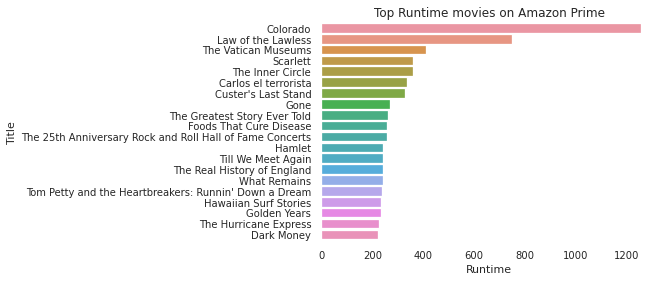

In [106]:
# Runtime
runtime_net = prime_movies.sort_values(by='Runtime',ascending=False).head(20)
runtime_net

sns.barplot(data=runtime_net, y='Title',x='Runtime')
plt.title('Top Runtime movies on Amazon Prime')

In [107]:
net_movies = prime_movies[prime_movies['IMDb'] > 8]
net_movies_count = net_movies.shape[0]
print("Movies with IMDB 8+ Rating in Amazon Prime: {}".format(net_movies_count))

Movies with IMDB 8+ Rating in Amazon Prime: 324


Text(0.5, 1.0, 'Top IMDB movies on Amazon Prime')

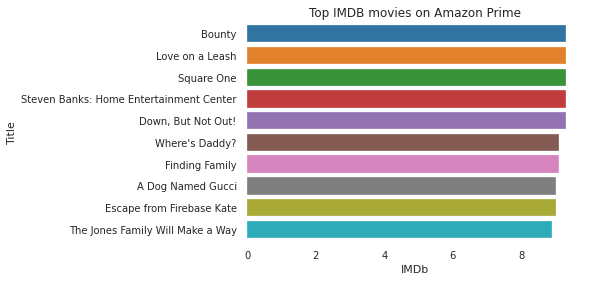

In [108]:
net_movies = net_movies.sort_values(by='IMDb', ascending=False).head(10)
sns.barplot(data=net_movies, y='Title',x='IMDb')
plt.title('Top IMDB movies on Amazon Prime')

In [109]:
movie_type = prime_movies['mov_type'].value_counts().index.tolist()
print(movie_type[:10])

['drama', 'comedy', 'horror', 'documentary', 'thriller', 'action', 'sci-fi', 'animation', 'western', 'romance']


In [110]:
def movie_plot(movie) : 
    print(movie)
    thriller_net = prime_movies[prime_movies['mov_type'] == movie]
    net_movies = thriller_net.sort_values(by='IMDb', ascending=False).head(10)
    sns.barplot(data=net_movies, y='Title',x='IMDb')
    plt.title('Top 10 {} movies on Amazon Prime'.format(movie))

thriller


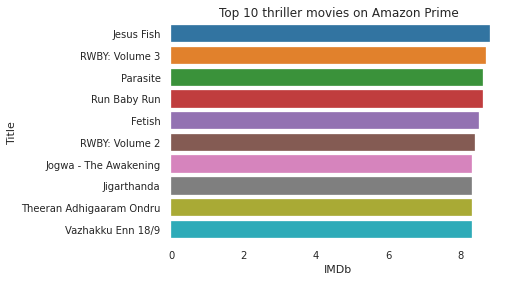

In [111]:
movie_plot('thriller')

sci-fi


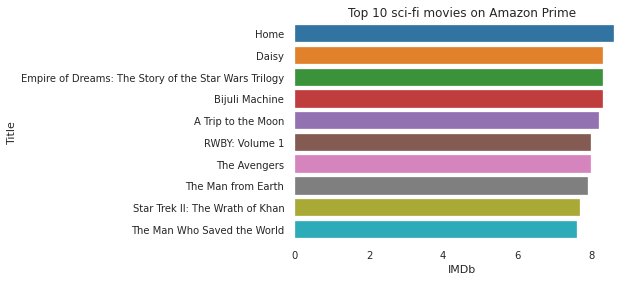

In [112]:
movie_plot('sci-fi')

action


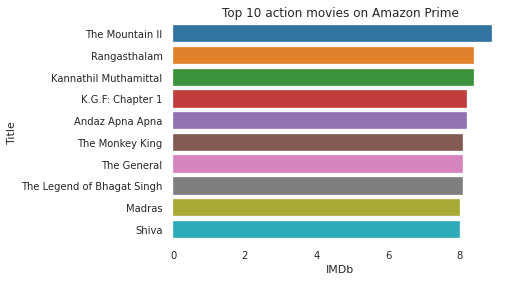

In [113]:
movie_plot('action')

horror


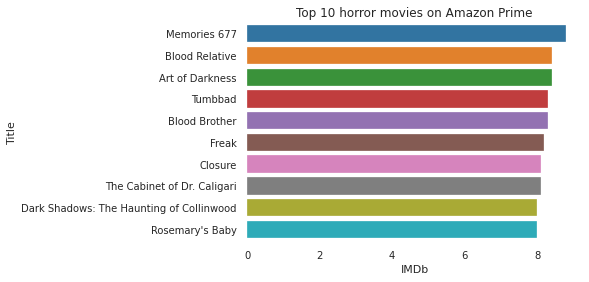

In [114]:
movie_plot('horror')

animation


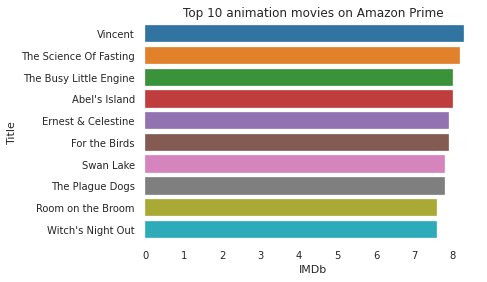

In [115]:
movie_plot('animation')

*Hypothesis Testing*

In [116]:
points=movie_data['IMDb']
mu=points.mean()
sigma=points.std(ddof=0)
print("mu: ", mu, ", sigma:", sigma)

mu:  5.902751499412594 , sigma: 1.3478257911683673


H0: The sample is from the MoviesOnStreamingPlatforms, x_bar = μ.

HA: The sample is not from the MoviesOnStreamingPlatforms, x_bar != (not equal) μ.

In [117]:
movie_data['IMDb'].head().mean()

8.66

The above value is taken as the sample from the population = x_bar = 8.66

In [118]:
z_critical = 1.96 # alpha level of 0.05 and two-tailed test
x_bar = 8.66
N = 5
SE = sigma/np.sqrt(N)
z_stat = (x_bar - mu)/SE
print(z_stat)

4.57432638444195


Since z_stat is greater than z_critical we reject the null hypothesis and accept the althernative. Statistically, we say the sample mean is different than the population mean and thus the sample is drawn from the population.

But what if the sample size was larger? Let's redo the calculation with N=300.

In [119]:
N = 300;
SE = sigma/np.sqrt(N)
z_stat = (x_bar - mu)/SE
print(z_stat)

35.43257981412172


Here too we get a value of z_stat which is greater than z_critical. Hence we accept Alternate hypothesis.

*Correlation*

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie,axis,show
%matplotlib inline

In [125]:
movie_data = pd.read_csv("/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv")
df_corr = movie_data.corr()
fields = ['Type', 'ID']
# drop rows
df_corr.drop(fields, inplace=True)
# drop cols
df_corr.drop(fields, axis=1, inplace=True)

Index(['Unnamed: 0', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Directors', 'Genres',
       'Country', 'Language', 'Runtime'],
      dtype='object')

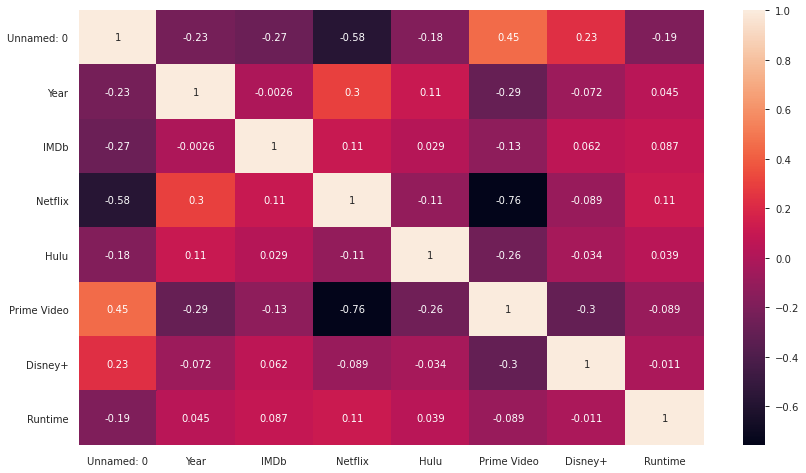

In [128]:
corr = movie_data.corr(method='kendall')
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)
plt.savefig("correlation.png")
movie_data.columns